In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
BASE_DIR = os.path.dirname(os.getcwd())
BASE_DIR

'c:\\Users\\PC\\Desktop\\UIT\\TU_CHON_TU_DO\\CS406_XU_LY_ANH_VA_UNG_DUNG\\image-classification'

In [12]:
HIS_DIR = os.path.join(BASE_DIR, "history")
HIS_DIR

'c:\\Users\\PC\\Desktop\\UIT\\TU_CHON_TU_DO\\CS406_XU_LY_ANH_VA_UNG_DUNG\\image-classification\\history'

In [13]:
MODELS = [
    "EfficientNetB5",
    "DenseNet121",
    "ResNet50V2",
    "MobileNetV2",
]

In [16]:
histories = {}
for model_name in MODELS:
    file_path = os.path.join(HIS_DIR, f"{model_name}_history.csv")
    if os.path.exists(file_path):
        histories[model_name] = pd.read_csv(file_path)
    else:
        raise FileNotFoundError(f"History file not found for {model_name} at {file_path}")

histories

{'EfficientNetB5':    accuracy      loss  val_accuracy  val_loss  learning_rate
 0  0.846010  0.443498      0.920527  0.239415          0.001
 1  0.889740  0.298592      0.923022  0.224405          0.001
 2  0.898290  0.275415      0.926230  0.210661          0.001
 3  0.902565  0.264302      0.933001  0.200974          0.001
 4  0.904613  0.251801      0.929793  0.200763          0.001,
 'DenseNet121':    accuracy      loss  val_accuracy  val_loss  learning_rate
 0  0.777699  0.599065      0.903065  0.276590          0.001
 1  0.868365  0.358013      0.909836  0.253211          0.001
 2  0.873709  0.330993      0.915895  0.240200          0.001
 3  0.879676  0.319486      0.915895  0.228911          0.001
 4  0.883684  0.317806      0.916251  0.232100          0.001,
 'ResNet50V2':    accuracy      loss  val_accuracy  val_loss  learning_rate
 0  0.829177  0.475988      0.901996  0.262579          0.001
 1  0.877895  0.325878      0.901996  0.259132          0.001
 2  0.891343  0.29611

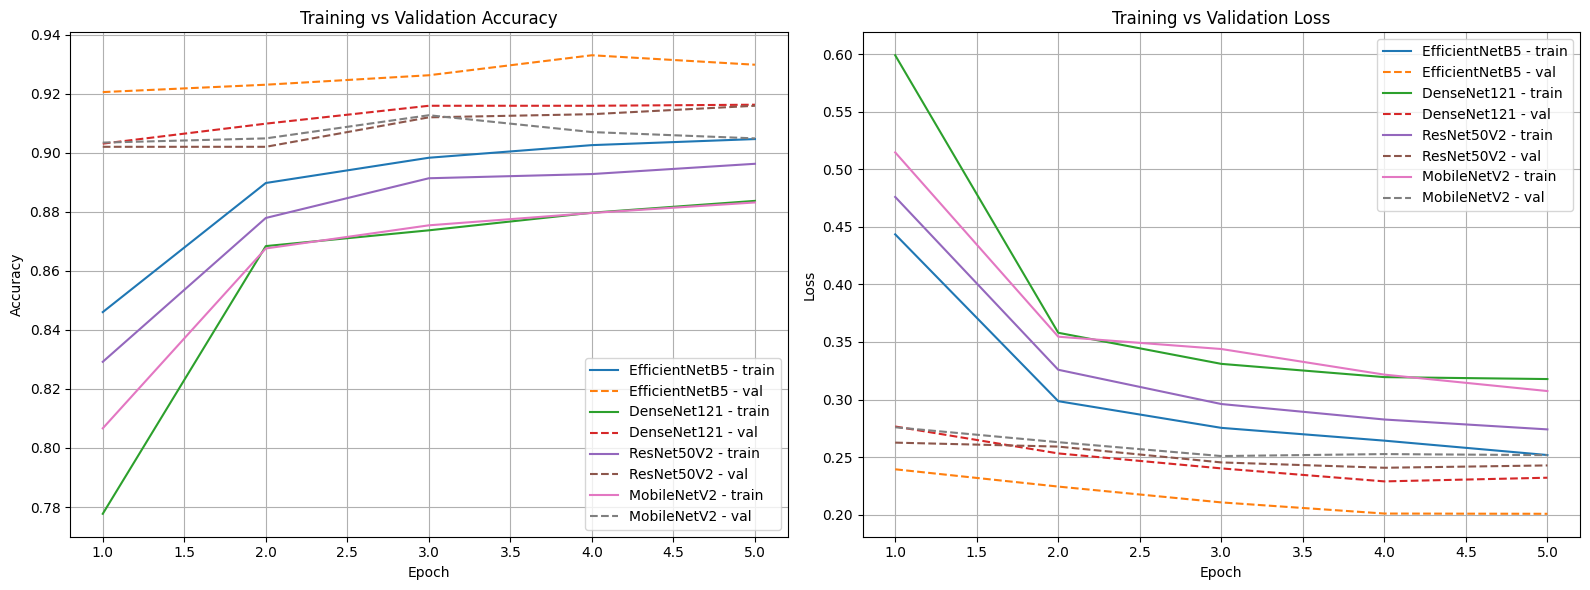

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

for name, hist in histories.items():
    axs[0].plot(range(1, len(hist["accuracy"]) + 1), hist["accuracy"], label=f"{name} - train")
    axs[0].plot(range(1, len(hist["val_accuracy"]) + 1), hist["val_accuracy"], linestyle="--", label=f"{name} - val")
axs[0].set_title("Training vs Validation Accuracy")
axs[0].set_xlabel("Epoch")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid()

for name, hist in histories.items():
    axs[1].plot(range(1, len(hist["loss"]) + 1), hist["loss"], label=f"{name} - train")
    axs[1].plot(range(1, len(hist["val_loss"]) + 1), hist["val_loss"], linestyle="--", label=f"{name} - val")
axs[1].set_title("Training vs Validation Loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend()
axs[1].grid()

fig.tight_layout()

In [48]:
summary_data = []

for name, hist in histories.items():
    best_epoch = hist["val_accuracy"].idxmax() + 1
    best_val_acc = hist["val_accuracy"].max()
    best_val_loss = hist["val_loss"][best_epoch - 1]
    final_train_acc = hist["accuracy"].iloc[-1]
    final_val_acc = hist["val_accuracy"].iloc[-1]

    summary_data.append({
        "Model": name,
        "Best Epoch": best_epoch,
        "Best Val Accuracy": best_val_acc,
        "Best Val Loss": best_val_loss,
        "Final Train Accuracy": final_train_acc,
        "Final Val Accuracy": final_val_acc,
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values("Final Train Accuracy", ascending=False).reset_index(drop=True)
summary_df.style.background_gradient(cmap="Blues", subset=["Best Val Accuracy"])

,Model,Best Epoch,Best Val Accuracy,Best Val Loss,Final Train Accuracy,Final Val Accuracy
0,EfficientNetB5,4,0.933001,0.200974,0.904613,0.929793
1,ResNet50V2,5,0.915895,0.242778,0.896242,0.915895
2,DenseNet121,5,0.916251,0.232100,0.883684,0.916251
3,MobileNetV2,3,0.912687,0.250913,0.883149,0.904847


In [52]:
best_model = summary_df.iloc[0]["Model"]
best_acc = summary_df.iloc[0]["Best Val Accuracy"]

In [56]:
f"Best model: {best_model} with validation accuracy = {best_acc:.4f}"

'Best model: EfficientNetB5 with validation accuracy = 0.9330'